In [2]:
import requests
from config import api_key
headers = {
    "authorization": api_key,
    "content-type": "application/json"
}

In [15]:
endpoint = "https://api.assemblyai.com/v2/transcript"
json = {
    "audio_url": "https://bit.ly/3rBnQ8i",
    "sentiment_analysis": True
}
response = requests.post(endpoint, json=json, headers=headers)
transcription_id = response.json().get('id')

In [3]:
transaction_id = 'oqx6sby2ly-8750-4d8a-8e06-ff4fb0c14390'
end_point = f"https://api.assemblyai.com/v2/transcript/{transaction_id}"
res = requests.get(end_point, headers=headers)
res.json()

{'id': 'oqx6sby2ly-8750-4d8a-8e06-ff4fb0c14390',
 'language_model': 'assemblyai_default',
 'acoustic_model': 'assemblyai_default',
 'language_code': 'en_us',
 'status': 'completed',
 'audio_url': 'https://bit.ly/3rBnQ8i',
 'text': "Ted talks are recorded live at the Ted Conference. This episode features psychologist and happiness expert Dan Gilbert. This talk contains powerful visuals. Download the video@ted.com Dan Gilbert when you have 21 minutes to speak 2 million years seems like a really long time, but evolutionarily 2 million years is nothing. And yet, in 2 million years, the human brain has nearly tripled in mass, going from the one and a quarter pound brain of our ancestor here habilis to the almost three pound meatloaf that everybody here has between their ears. What is it about a big brain that nature was so eager for everyone else to have one? Well, it turns out when brains triple in size, they don't just get three times bigger. They gain new structures. And one of the main 

In [5]:
data = {}
for sentence in res.json().get('sentiment_analysis_results'):
    if sentence.get('sentiment') in data:
        data[sentence.get('sentiment')] +=1
    else:
        data[sentence.get('sentiment')] = 1
    
data['total'] = len(res.json().get('sentiment_analysis_results'))
print(data)

{'NEUTRAL': 180, 'POSITIVE': 57, 'NEGATIVE': 64, 'total': 301}


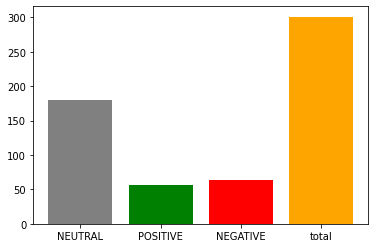

In [12]:
import matplotlib.pyplot as plt
names = list(data.keys())
values = list(data.values())
c = ['gray', 'green', 'red', 'orange']
plt.bar(range(len(data)), values, tick_label=names, color=c)
plt.show()